In [1]:
"""
Purpose: To demonstrate how a neuron object's lite graph 
can be exported as a swc file and then analyzed with
any other software that analyzes swc files. This example
will use the morphopy software package

source: https://github.com/berenslab/MorphoPy/tree/master/morphopy
"""

"\nPurpose: To demonstrate how a neuron object's lite graph \ncan be exported as a swc file and then analyzed with\nany other software that analyzes swc files. This example\nwill use the morphopy software package\n\nsource: https://github.com/berenslab/MorphoPy/tree/master/morphopy\n"

In [2]:
%load_ext autoreload
%autoreload 2

# Step 1: Load the Data (Neuron Lite Object)

## Loading the neuron object

In [3]:
from neurd import neuron_utils as nru

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [4]:
segment_id = 864691134917511946

In [5]:
mesh_path = "../Auto_Proof_Pipeline/Single_Soma_Exc/864691134917511946.off"
obj_autoproof_path = "../Auto_Proof_Pipeline/Single_Soma_Exc/864691134917511946_auto_proof.pbz2"

neuron_obj = nru.decompress_neuron(
    filepath=obj_autoproof_path,
    original_mesh=mesh_path
)

Decompressing Neuron in minimal output mode...please wait


## Retrieving the neuron lite object (just a networkx graph representation)

In [6]:
G_proof = neuron_obj.neuron_graph_after_proof
G_proof

## Visualizing the neuron lite object

In [8]:
from neuron_morphology_tools import neuron_nx_utils as nxu

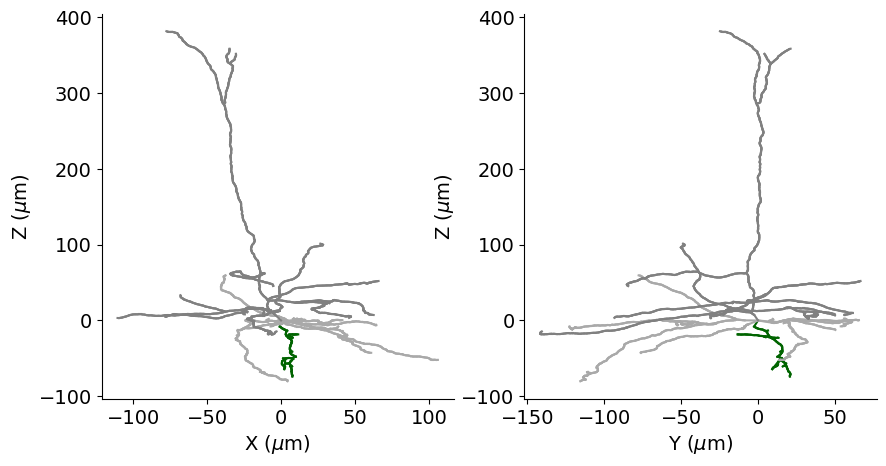

In [9]:
nxu.plot(G_proof)

In [10]:
nxu.print_compartment_colors()

Compartment Colors
------------------
   apical : blue
   apical_shaft : aqua
   apical_tuft : purple
   basal : brown
   axon : red
   oblique : green
   dendrite : lightsteelblue
   apical_total : magenta
   soma : black


In [11]:
nxu.plot_all_skeleton_compartments(G_proof)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

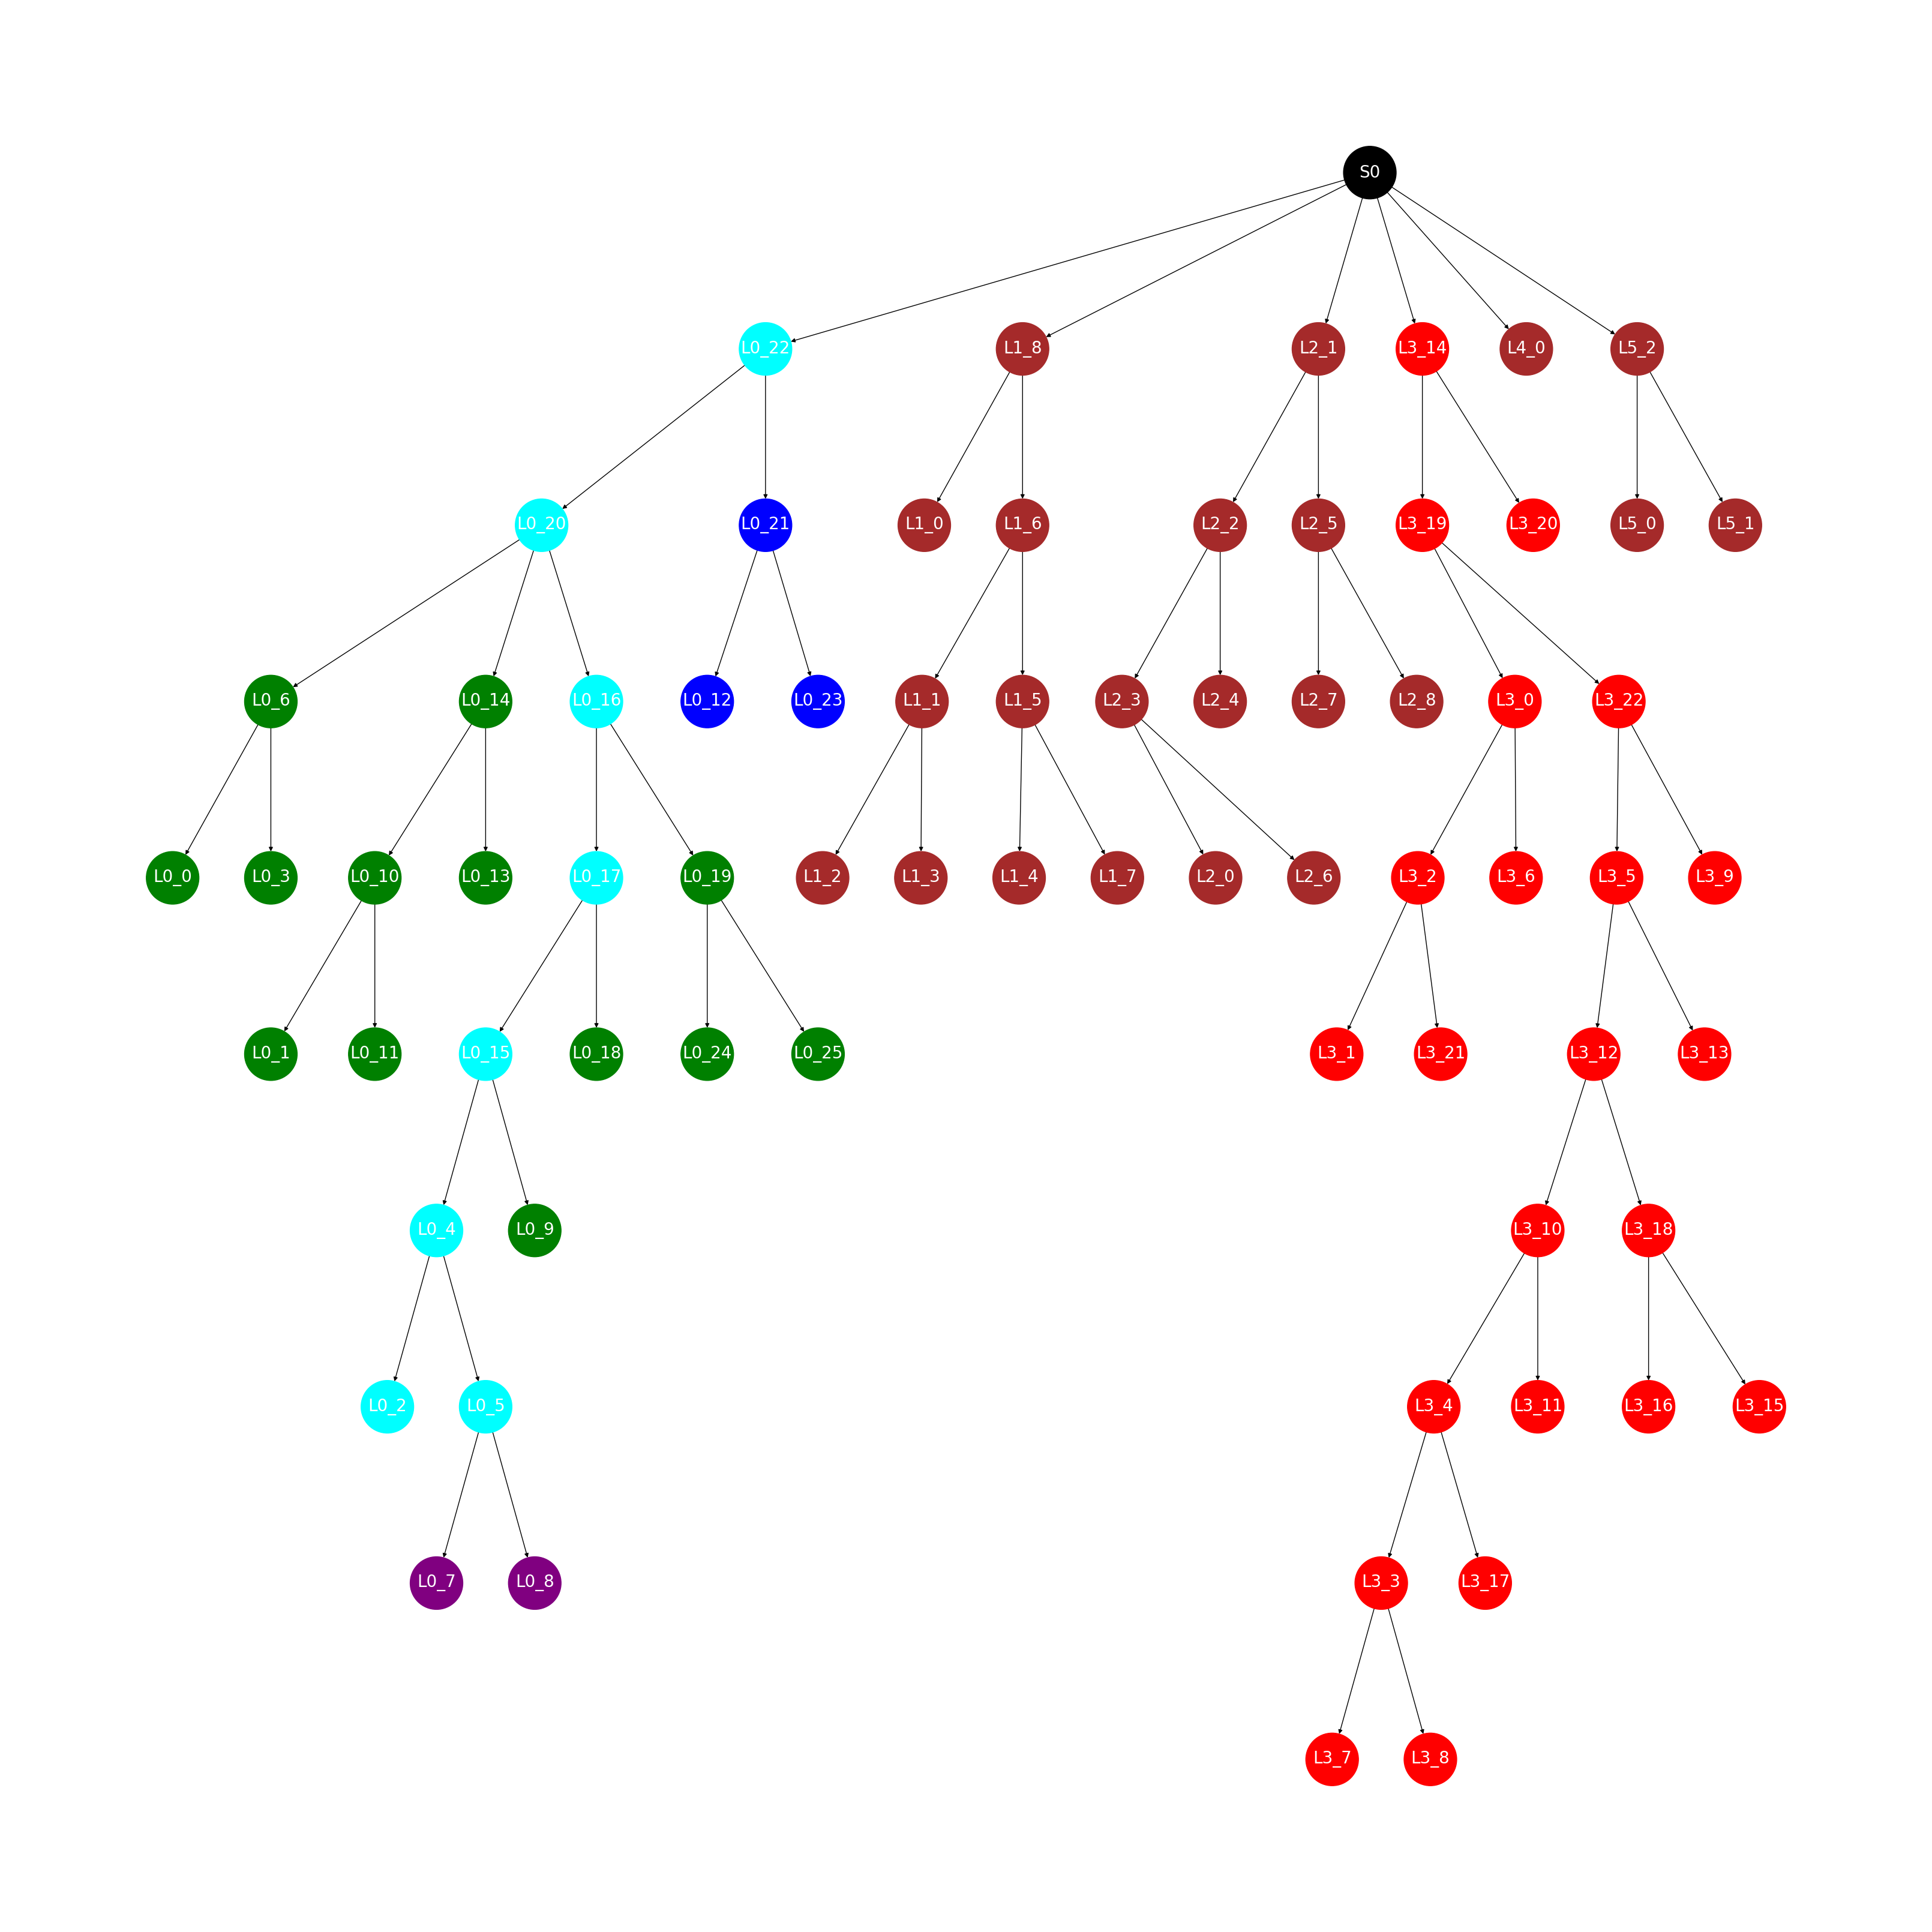

In [12]:
nxu.draw_tree(
    G_proof,
    compartment_colors = True)

# Step 2: Export Neuron Lite Object as SWC

In [13]:
filename = f"{segment_id}_proofread.swc"

filepath = nxu.export_swc_file(
    G_proof,
    filename =filename)
filepath

'/neurd_packages/NEURD/Applications/Tutorials/SWC_Output_and_Analysis/864691134917511946_proofread.swc'

# Step 3: Anaylze SWC file with external package (morphopy in this example)

In [14]:
"""
3rd party: https://github.com/berenslab/MorphoPy/tree/master/morphopy

Note: the neuron_morphology_tools package provides a wrapper module for morphopy called morphopy_utils
that just makes analysis using morphopy more straight forward, but
a 3rd party library could be used without any wrappers or neurd if need be
"""

'\n3rd party: https://github.com/berenslab/MorphoPy/tree/master/morphopy\n\nNote: the neuron_morphology_tools package provides a wrapper module for morphopy called morphopy_utils\nthat just makes analysis using morphopy more straight forward, but\na 3rd party library could be used without any wrappers or neurd if need be\n'

In [15]:
from neuron_morphology_tools import morphopy_utils as mpu

In [16]:
N_tree_obj =mpu.ntree_obj_from_swc(filepath = filename)
N_tree_obj

In [17]:
stats_df = mpu.morphometrics(N_tree_obj)
stats_df

,normalized depth,axon branch points,axon width,axon depth,axon height,axon robust width,axon robust depth,axon robust height,axon x-bias,axon z-bias,...,"""apical"" width","""apical"" robust height","""apical"" robust width","""apical"" total length","""apical"" branch points",Log1p fraction of axon above dendrite,Log1p fraction of axon below dendrite,Log1p fraction of dendrite above axon,Log1p fraction of dendrite below axon,EMD axon dendrite
0,0.1,11,12.554775,74.021385,34.344,9.223155,60.459225,31.664279,10.730887,7.765998,...,176.484865,169.960881,153.40512,1592.078136,12,0.0,0.0,0.044004,0.198207,0.912909


In [18]:
stats_df.to_dict(orient='records')[0]

{'normalized depth': 0.1,
 'axon branch points': 11,
 'axon width': 12.554775069551658,
 'axon depth': 74.02138461815368,
 'axon height': 34.34400043497584,
 'axon robust width': 9.223155164649569,
 'axon robust depth': 60.45922451413428,
 'axon robust height': 31.664278599825057,
 'axon x-bias': 10.73088655034604,
 'axon z-bias': 7.76599817369506,
 'axon tips': 12,
 'axon total length': 175.62284419872483,
 'axon max path distance to soma': 98.80423792090491,
 'axon max branch order': 8,
 'axon max path angle': 118.4386345768986,
 'axon median path angle': 14.363460977772213,
 'axon max segment length': 20.77704651969129,
 'axon log max tortuosity': 0.7301788794787207,
 'axon log min tortuosity': 0.00013578891860179345,
 'axon log median tortuosity': 0.0489666587112776,
 'axon max branch angle': 164.7940035956034,
 'axon min branch angle': 35.07458630186894,
 'axon mean branch angle': 96.69631745320817,
 'axon above soma': 0.844559585492228,
 'soma radius': 8.526969951853163,
 'mean i